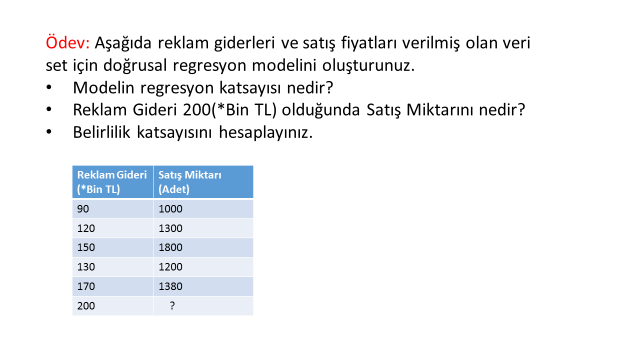

In [1]:
import numpy as np
import pandas as pd

In [2]:
reklamGideri = np.array([90,120,150,130,170])

In [3]:
satisMiktari = np.array([1000,1300,1800,1200,1380])

In [4]:
import matplotlib.pyplot as plt

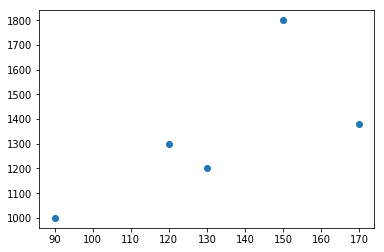

In [5]:
plt.scatter(reklamGideri,satisMiktari)

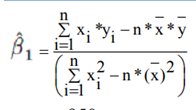

### Regresyon Katsayısı

In [6]:
B1 = ((reklamGideri * satisMiktari).sum() - 5 * reklamGideri.sum()/reklamGideri.shape[0] * satisMiktari.sum()
      /satisMiktari.shape[0]) / ((reklamGideri**2).sum() - 5 * (reklamGideri.sum()/reklamGideri.shape[0])**2)
B1

6.75

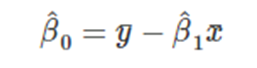

###  Belirlilik katsayısı

In [7]:
B0 = (satisMiktari.sum() / satisMiktari.shape[0]) - B1 * (reklamGideri.sum() / reklamGideri.shape[0])
B0

445.0

### Fiyat Tahmini

In [8]:
# X=200 için fisatisMiktariat tahmini
satisMiktari_hat = B0 + B1*200
satisMiktari_hat

1795.0

In [9]:
y_hat = B0 + B1*150
y_hat

1457.5

In [10]:
df = pd.DataFrame({"ReklamGideri": reklamGideri, "SatısMiktari": satisMiktari})

In [11]:
X_train = df[["ReklamGideri"]]
y_train = df["SatısMiktari"]

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
regressor = LinearRegression()

In [14]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

###  Belirlilik katsayısı

In [15]:
regressor.intercept_

444.9999999999999

### Regresyon Katsayısı

In [16]:
regressor.coef_

array([6.75])

### Fiyat Tahmini

In [22]:
satisTahmin = regressor.predict([[200]]) # reklam gideri 200bin TL olduğu zaman satış miktarı
satisTahmin

array([1795.])

In [18]:
y_pred = regressor.predict(X_train) # reklam giderlerine göre modelin tahminleri
y_pred

array([1052.5, 1255. , 1457.5, 1322.5, 1592.5])

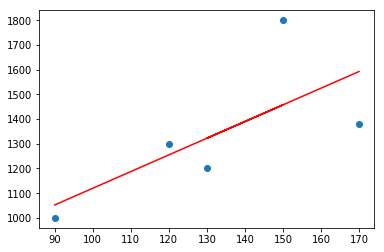

In [19]:
plt.scatter(reklamGideri, satisMiktari)
plt.plot(reklamGideri, y_pred, color = 'red')

In [20]:
from sklearn.metrics import r2_score

In [21]:
r2_score(y_train, y_pred)

0.47916666666666663